# 강화학습_미로찾기(Temporal Difference learning)

## 목차
#### 1) 강화 학습에 대해
#### 2) 강화 학습 중 Temporal Difference learning을 이용한 미로찾기

# 1) 강화학습

1) 정의 :<br> 강화학습은 supervisor(정답을 알려주는 사람)이 없이, 에이전트(Agent)가 주어진 환경(State)에서 어떤 행동(Action)을 취하고 이에 대한 보상(Reward)를 얻고, reward를 극대화하도록 정책을 학습하는 방법.<br><br>

2) 장점과 단점 :<br> 강화학습은 supervisor가 없기 때문에, 소요 시간이 오래 걸리지만, 때때로 supervisor(사람)가 제시한 방법보다 훨씬 더 효과적으로 문제를 해결할 수 있다.<br><br>

3) 사용된 용어 및 관련된 개념 정리:<br>
    1.St = 시간 t의 상태<br>
    2.At = 시간 t의 행동<br>
    3.Vπ(s) = 상태가치함수(어떤 상태의 좋고/나쁨을 평가함)<br>
    4.Qπ(s,a) = 행동가치함수(시간 s에 대하여 행동 a를 했을 때 행동의 좋고, 나쁨에 대해 나타내는 가치함수)<br>
    5.Reward = 에이전트가 특정한 상태에서 특정한 행동을 했을 때의 보상을 나타냄<br>
    6.Discount Factor gamma = 미래의 보상에 대한 가중치를 나타냄, gamma값이 크면 미래의 보상에 대해서만 중요하게 생각하고, gamma값이 작으면 현재의 이익만을 고려하여 행동<br>
    7.Epsilon Greedy epsilon = 탐험(exploration)과 활용(exploitation) 사이의 균형을 조절하는 데 사용, 다시 말해 지금까지 보상이 컸던 행동을 할 것이냐 아니면 새로운 탐험을 할 것이냐에 대한 비율을 나타냄<br><br>

4) Temporal Diffenrent<br>
4-1) Dynamic Programming : 동적계획법이란 전체 문제를 여러개의 하위 문제로 나누어 풀고, 하위 문제들의 해결방법들을 결합하여 최종 문제를 해결하는 방식으로, 강화학습의 TD에서는 하나의 문제를 2개 이상의 하위 문제로 쪼개고 각각을 최적화하게 되면 원래 문제도 최적화를 할 수 있고, 서브 문제들이 여러번 반복적으로 나타나기 떄문에 하나의 서브 문제를 저장했다가 다시 사용하는 것이 가능하는 원리를 이용하여 MDP 상황에서 step 별로 연산을 할 수 있고, 각 step의 가치 함수는 저장 되었다가 연산할 때 다시 사용할 수 있다.<br>
4-2) MC(Monte carlo) : MC는 정확한 수학 수식에 의해 계산하거나 측정하는 게 아니라 확률적인 방법에 의해 값을 통계적으로 계산하는 방법이고, 에이전트가 동작하는 환경은 시작과 끝이 있는 에피소드 단위의 환경에서 사용하여, 몬테카를로 방법은 에피소드 단위로 직접 실행을 하고, 결과를 관찰하고 무한히 반복하여 평균을 내면, 진짜상태가치함수에 수렴한다.<br>
4-3) Temporal Different : MC에서 에피소드가 끝나면 반환값(가치함수)을 주지만, 조금 더 빨리 반환값(가치함수)을 계산하고 싶어서 나온 방법으로 하나의 step에 하나의 action을 통해 상태가치함수를 update함.업데이트는 greedy한 방식으로 상태가치함수가 가장 큰 방식으로 업데이트를 진행한다. Temporal Difference (TD) 학습은 강화 학습에서 사용되는 학습 알고리즘 중 하나로, 현재 상태에서의 가치를 현재의 보상과 다음 상태의 가치의 추정치를 조합하여 업데이트하는 방식이다. 
<br><br>
Q(s,a)←Q(s,a)+α⋅[R+γ⋅max a ′Q(s ′,a ′)−Q(s,a)]<br><br>

5) 미로찾기<br>
현재 상태에서 현재 행동을 선택하고, 다음 상태에서의 최적 행동에 대한 최대 가치를 고려하여 현재 상태-행동 쌍에 대한 가치를 업데이트함,

# 2) 강화 학습 중 Temporal Difference learning을 이용한 미로찾기
## 2-1) Agent Class 정의
## 2-2) Environment Class 정의
## 2-3) main 정의
## 2-4) Report : hyperparameter(episode, alpha, gamma, epsilon)에 따른 Reward

In [3]:
## 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import random
import os
import time


# 미로 csv 파일 불러오기 예시 지도 3개정도만 생성 해보기
LABYRINTH_FILE = "labyrinth.csv"

## 2-1) Agent Class정의
#### class에 사용된 property 정의
- ACTIONS : agent의 행동을 4가지로 나타냄.
#### class에 사용된 method 정의
- \_\_init\_\_ : Agent class 생성자(객체 생성, 초기화)<br>
- get_action_eps_greedy: 탐욕적 정책을 사용하여 행동을 수행하고, (1-epsilon)의 확률로 무작위 행동을 수행. random한 값을 생성하고, 그값이 (1- epsilon)보다 작으면 현재까지 학습된 policy에서 가장 가치 있는 행동을 선택, 크면 무작위 행동을 선택하여 새로운 experiment를 획득<br>
- get_action_greedy: 지금까지 update해왔던(학습해왔던) Q 함수를 기준으로 가장 Q함수 값이 큰(가장 가치 있는 행동을 의미) 행동을 선택<br>
- get_action_symb: 행동 기호를 반환. (출력을 위한 목적으로 up, left,down,right 등 4가지 방향을 반환)<br>
- update_Q_function: 에피소드 내에서 정책을 실시간으로 업데이트하는 TD 단계를 수행,현재 상태에서의 행동 가치를 현재의 가치에 현재 행동으로 얻은 보상과 다음 상태에서의 최적 행동의 가치를 고려하여 업데이트하고,미래의 최적 행동 가치에 미래의 보상을 할인 계수(discount gamma)로 곱해 더한 값이 현재 행동 가치를 업데이트함. 또한 학습률(alpha)은 이 업데이트를 얼마나 강하게 적용할지를 결정 높은 학습률은 새로운 정보를 빠르게 받아들이고, 낮은 학습률은 이전의 정보를 보다 더 가중치를 두어 반영
- \_\_repr\_\_: 가능한 모든 동작-상태에 대한 Q 함수(행렬)를 출력

In [4]:
class Agent:

    # 에이전트의 Action을 4가지로 정의
    ACTIONS = {"UP": 0, "LEFT": 1, "DOWN": 2, "RIGHT": 3}
    
    # Agent 클래스 생성자 : class의 property로 alpha,gamma,epsilon, lab_matrix_shape를 넘겨줌
    def __init__(self, alpha: int, gamma: int, epsilon: float, lab_matrix_shape: tuple):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.num_actions = len(self.ACTIONS)
        self.rows, self.columns = lab_matrix_shape
        # Q 행렬을 무작위로 초기화하는 작업
        self.Q = np.random.rand(self.rows, self.columns, self.num_actions)

    # 가능한 모든 동작-상태에 대한 Q 함수(행렬)를 출력하는 함수(메서드)
    def __repr__(self):
        for action in range(self.num_actions):
            print(f"Q(y,x) for action: {action}\n")
            print(str(np.round(self.Q[:, :, action], 2)) + "\n")

        return ""

    # epsilon-greedy 정책을 사용하여 행동을 선택하는 함수(메서드)
    def get_action_eps_greedy(self, state: tuple):
        # 현재 agent의 상태를 state 라는 tuple에 저장
        y_cor, x_cor = state
        # 임임의 eps라는 값을 생성 추후에 self.epsilon값과 비교해 탐색을 할것인지 지금까지 가장 greedy 상태를 선택할 것인지 선택함.
        eps = random.random()
        
        # eps와 self.epsilon을 비교하여 행동을 선택하고 return 값으로 ACTIONS = {"UP": 0, "LEFT": 1, "DOWN": 2, "RIGHT": 3}을 줌.
        # up인 경우 숫자 0을 반환
        
        # eps보다 self.epsilon이 큰 경우에는 무작위적인 탐색을 진행함.
        if eps < self.epsilon:
            return random.randint(0, self.num_actions-1)
        # eps가 큰 경우에는 지금까지 가장 greedy(상태가치함수가 가장 컸던)한 state를 선택함
        else:
            return np.argmax(self.Q[y_cor, x_cor])

    def get_action_greedy(self, state: tuple):
        # 학습이 끝난 후(정해두었던 episode가 끝난 후) 현재의 state를 입력으로 받고, 가장 greedy한 값을 찾음
        # 반환 값은 ACTIONS = {"UP": 0, "LEFT": 1, "DOWN": 2, "RIGHT": 3}으로 표현됨.
        # up인 경우 숫자 0을 반환
        y_cor, x_cor = state

        return np.argmax(self.Q[y_cor, x_cor])

    def get_action_symb(self, state):
        # 에이전트의 행동을 시각적으로 보여주기 위한 메서드임
        # 위의 함수에서 반환값으로 ACTIONS = {"UP": 0, "LEFT": 1, "DOWN": 2, "RIGHT": 3}을 줌
        # 반환값(0,1,2,3)과 agent class의 property의 값과 같다면 해당하는 방향에 알맞는 기호를 출력

        # get_action_greedy이라는 함수에 state라는 tuple 입력을 넣고, 가장 greedy한 action을 선택
        action = self.get_action_greedy(state)
        
        if action == self.ACTIONS["UP"]:
            return "^"
        if action == self.ACTIONS["LEFT"]:
            return "<"
        if action == self.ACTIONS["DOWN"]:
            return "v"
        if action == self.ACTIONS["RIGHT"]:
            return ">"

    def update_Q_function(self, prev_state, new_state, reward, action):
        # Q(s,a)←Q(s,a)+α⋅[R+γ⋅max a ′Q(s ′,a ′)−Q(s,a)]
        # prev_state : 현재 상태를 의미 tuple (y_row, x_col)
        # new_state : 새로운 상태를 의미 tuple (y_row, x_col)
        # reward : 해당 해동에 대한 action에 대한 보상, int 형
        # action : 현재 상태에서 새로운 상태로 전환을 의미 ACTIONS = {"UP": 0, "LEFT": 1, "DOWN": 2, "RIGHT": 3}

        # \는 다음 줄에 이어서 적겠다는 뜻
        # Q1(s,a)←Q0(s,a)+α⋅[R+γ⋅max a ′Q(s ′,a ′)−Q(s,a)]
        # Q1(s,a)는 새로운 상태를 나타냄,
        # Q0(s,a)는 이전의 상태를 의미하고, alpha값(학습률)
        # [R+γ⋅max a ′Q(s ′,a ′)−Q(s,a)] 다음 상태 s에서 가능한 모든 행동중 최대의 Q값을 찾기,
        # 다음 상태에서의 최적 행동 가치를 나타냄
        
        #현재 상태에서의 행동 가치를 현재의 가치에 현재 행동으로 얻은 보상과 다음 상태에서의 최적 행동의 가치를 고려하여 업데이트
        #미래의 최적 행동 가치에 미래의 보상을 할인 계수로 곱해 더한 값이 현재 행동 가치를 업데이트
        #학습률은 이 업데이트를 얼마나 강하게 적용할지를 결정 높은 학습률은 새로운 정보를 빠르게 받아들이고, 낮은 학습률은 이전의 정보를 보다 더 가중치를 두어 반영
        self.Q[prev_state[0], prev_state[1], action] =\
            self.Q[prev_state[0], prev_state[1], action] +\
            self.alpha * (reward + self.gamma * self.Q[new_state[0], new_state[1]].max() -
                          self.Q[prev_state[0], prev_state[1], action])

## 2-2)Environment class 정의
#### class의 property 정의 :
지도의 구조를 0,1,2,3으로 정의하고, 보상과 벽으로 갔을 때 보상을 정의함.


#### class의 property 정의 :
- \_\_init\_\_ : Environment class 생성자(객체 생성, 초기화), 따로 준비한 지도가 있다면 True로 바꾸고, 지도파일(csv)를 넣어주면 됨.<br>
- init_default_labyrinth : 미로 파일이 없는 경우 임의로 파일을 생성하는 메서드
- \_\_repr\_\_ 와 policy_str : 학습된 policy를 화면에 표시하는 메서드
- new_episode : episode가 한 번 끝나고, 새로운 episode를 위해 agent의 위치를 시작점으로 재설정하는 메서드
- perform_action : agent가 선택한 행동에 따라 현재 상태를 업데이트하고, 현재 까지의 보상 및 목표에 도달 여부를 반환하는 메서드

In [5]:
class Environment:
    
    LAB = 0
    WALL = 1
    START = 2
    FINISH = 3

    REWARD = -1
    WALL_REWARD = -30

    
    def __init__(self, import_maze_csv=False):
        # csv 파일이 있는 지 없는지 판별
        # 있다면 추후에 조건문을 통해 csv를 받아드림.
        self.from_csv = import_maze_csv  
        self.lab_matrix = None
        
        # 시작점 위치, tuple
        self.start_pos = tuple()
        # 끝나는 지점의 위치, tuple 
        self.finish_pos = tuple()
        # 현재 agent의 위치, tuple
        self.agent_pos = tuple()

        # 파일이 있으면 csv 파일을 읽어드림
        if self.from_csv:
            self.init_labyrinth_from_csv()
        # 파일이 없으면 아래에 설정한 default 파일을 읽어드림
        else:
            self.init_default_labyrinth()

        # start와 finish와 현재 위치를 초기화하는 작업
        # np.argwhere NumPy 라이브러리에서 제공되는 함수로, 조건을 만족하는 배열 요소의 인덱스를 찾아 반환.
        # 해당 요소와 값이 같은 index를 반환해줌
        self.start_pos = tuple(np.argwhere(self.lab_matrix == self.START)[0])
        self.finish_pos = tuple(np.argwhere(self.lab_matrix == self.FINISH)[0])
        self.agent_pos = self.start_pos

        # 가로와 세로를 tuple 값으로 정해줌
        self.rows, self.cols = self.lab_matrix.shape

        
    # 지도 파일(csv)가 없는 경우에 default하게 사용하기 위한 미로
    def init_default_labyrinth(self):
        self.lab_matrix = np.array([
            [self.WALL, self.WALL, self.WALL, self.WALL,
                self.WALL, self.WALL, self.WALL, self.WALL],
            [self.WALL, self.LAB, self.LAB, self.LAB,
                self.LAB, self.LAB, self.LAB, self.WALL],
            [self.START, self.LAB, self.WALL, self.WALL,
                self.LAB, self.WALL, self.LAB, self.WALL],
            [self.WALL, self.LAB, self.LAB, self.WALL,
                self.WALL, self.LAB, self.LAB, self.WALL],
            [self.WALL, self.WALL, self.LAB, self.LAB,
                self.WALL, self.LAB, self.WALL, self.WALL],
            [self.WALL, self.LAB, self.WALL, self.LAB,
                self.WALL, self.LAB, self.LAB, self.WALL],
            [self.WALL, self.LAB, self.LAB, self.LAB,
                self.LAB, self.WALL, self.LAB, self.FINISH],
            [self.WALL, self.WALL, self.WALL, self.WALL,
                self.WALL, self.WALL, self.WALL, self.WALL]
        ])

        return

    
    # 지도 파일을 가져오기 위한 메서드
    # 지도 파일을 가져오기 위해 제약조건을 검사하는 함수
    def init_labyrinth_from_csv(self, path=LABYRINTH_FILE):
        
        # 주의 사항 1: 헤더가 없어야함
        # 주의 사항 2: 오직 4가지 허용된 심볼만 사용해야함
        # 주의 사항 3: 시작 지점은 하나만 존재하고, 목표 지점도 하나만 존재해야함.
        
        # pandas의 read_csv를 통해 csv파일을 읽어옴.
        df_lab = pd.read_csv(path, header=None)
        
        # lab_matrix 생성 
        self.lab_matrix = df_lab.to_numpy()

        # np.unique함수를 이용해서 csv 파일에 이상이 없는 지 검사, 중복없이 4가지 symbol만 나옴
        unique, counts = np.unique(self.lab_matrix, return_counts=True)
        
        # error를 감지하는 함수 
        # unique의 길이가 4가 아니면 해당 string 출력
        assert len(
            unique) == 4, "오직 4가지의 symbol만 사용이 가능합니다. \nLAB = 0; WALL = 1; START = 2;FINISH = 3;"

        dict_values = dict(zip(unique, counts))
        assert dict_values[self.START] == 1 and dict_values[self.FINISH] == 1, "지도 파일에 출발과 도착은 반드시 하나씩 존재해야함\n"

        return

    ## agent와 state를 화면에 표시
    def __repr__(self):
        environment_description = ''

        # for문을 통해서 agent
        # row(가로)와 col(세로)를 통해서 미로를 2차원 list로 보고
        # for문을 돌리면서 각각의 list를 symbol로 표시
        for i in range(0, self.rows):
            for j in range(0, self.cols):
                if self.agent_pos == (i, j):
                    # 도착했을 때 표시
                    if self.lab_matrix[i, j] == self.FINISH:
                        environment_description += '🏁'
                    # agent를 다음과 같이 표시
                    else:
                        environment_description += '🤖'
                        
                    # 출발 지점에 대한 표시
                elif self.lab_matrix[i, j] == self.LAB or self.lab_matrix[i, j] == self.START:
                    environment_description += '. '
                    # 벽에 대한 표현
                elif self.lab_matrix[i, j] == self.WALL:
                    environment_description += '█ '
                    # 도착에 대한 표현
                elif self.lab_matrix[i, j] == self.FINISH:
                    environment_description += '✔ '

            environment_description += '\n'
        return environment_description

    
    def policy_str(self, agent):
        # agent라는 강화학습 에이전트 객체를 나타내고, 
        # return 값으로 에이전트가 학습한 정책을 텍스트 형태로 나타냄

        policy_description = ''

        for i in range(0, self.rows):
            for j in range(0, self.cols):
                ## 벽이면 █ 
                if self.lab_matrix[i, j] == self.WALL:
                    policy_description += '█ '
                ## 도착했으면 ✔
                elif self.lab_matrix[i, j] == self.FINISH:
                    policy_description += '✔ '
                else:
                    action_symb = agent.get_action_symb(state=(i, j))
                    policy_description += action_symb + ' '
            policy_description += '\n'
        return policy_description

    
    def new_episode(self):
        # 새로운 episode를 시작할 때 agent의 위치를 초기 상태로 돌림
        self.agent_pos = self.start_pos
        return self.agent_pos

    
    def perform_action(self, action):
        # parameter action은 agent가 수행할 행동을 나타내는 매개변수
        (y, x) = self.agent_pos

        ## parameter 값에 따라 agent의 position에 변화를 줌
        ## up 일경우
        if action == Agent.ACTIONS["UP"]:
            y -= 1
        ## left일 경우
        elif action == Agent.ACTIONS["LEFT"]:
            x -= 1
        ## down 일경우
        elif action == Agent.ACTIONS["DOWN"]:
            y += 1
        ## right 일경우
        elif action == Agent.ACTIONS["RIGHT"]:
            x += 1

        ## agent의 위치가 미로 안에 있는지 확인 하는 조건문
        if 0 < y < self.rows and 0 < x < self.cols:
            self.agent_pos = (y, x)

        # agnet의 위치와 agnet가 행동의 결과로 얻은 보상,
        # self.get_reward와 self.is_over이 없지만, 아래에 @ 데코레이션을 통해 생성함. 
        return self.agent_pos, self.get_reward, self.is_over

    
    ## @ 데코레이션 : 파이썬에서 클래스의 속성(property)인것 처럼 변환하는 기능을 제공
    @property
    def is_over(self):
        # agent가 finish 위치에 도착했는지를 boolean 값으로 나타냄
        return self.agent_pos == self.finish_pos

    
    @property
    def get_reward(self):
        ## reward의 기본값은 -1이고, 벽에 닿는다면 WALL_REWARD는 -30을 부여함
        ## 벽에 최대한 닿지 않고, 빠른 길을 택하는 게 가장 높은 reward를 받음. 
        y, x = self.agent_pos

        if self.lab_matrix[y, x] == self.WALL:
            return self.WALL_REWARD
        else:
            return self.REWARD

        
    def get_maze_shape(self):
        ## 미로 행렬의 행과 열의 개수로 계산하는 메서드
        ## numpy의 shape를 이용해서 lab_matrix의 shape을 계산함.
        return self.lab_matrix.shape

## 2-3) main 정의
#### main 함수
episode의 수와 alpha(학습률), gamma(미래에 보상에 대한 계수), epsilon(무작위 행동을 하는 확률 계수), import_maze_csv : csv 파일을 가져오는 지, trainning과정을 하나하나 보여주는 지에 대해 나타내는 파라미터를 가지고, agent와 envrionment의 객체를 생성해서 parameter에 따라 학습을 진행함.

In [16]:
# default argument 선언 
def main(n_episodes, alpha, gamma, epsilon, import_maze_csv =False,show_training=False, result_screening = True):
    """
    Parameters
    ----------
    n_episodes : 강화 학습 알고리즘을 위한 에피소드의 수

    alpha: 정책 업데이트의 가중치에 대한 계수

    gamma: 미래 상태 보상에 대한 TD(Q-learning) 알고리즘의 할인 계수, 미래 상태 보상에 대한 중요성을 조절

    espilon: 에이전트를 훈련하는 동안 무작위 행동을 선택할 확률을 설정하는 계수입니다.
            10%의 확률로 무작위 행동을 선택합니다.

    import_maze_csv: Bool (default is False)
        True로 설정하면 csv 파일에서 미로를 가져오고, 파일 경로는 처음 부분에 정의된 LABYRINT_FILE 상수에 의해 정의됩니다.
        3가지 option
        
    show_training: Bool (default is False)
         True로 설정하면 훈련 단계에서 에이전트 이동을 모든 에포크 동안 표시합니다.
            n_episodes가 큰 수이거나 미로 공간이 큰 경우 시간이 소요될 수 있습니다.
    """
    # 환경 객체를 생성함.
    environment = Environment(import_maze_csv=import_maze_csv)

    # 환격 객체의 get_maze_shape() 메서드를 이용해서 지도를 가져옴
    maze_shape = environment.get_maze_shape()
    
    # agent 클래스의 객체를 생성하고, 생성자에 alpha와 gamma , epsilon, map_shape를 넘겨줌
    agent = Agent(alpha=alpha, gamma=gamma, epsilon=epsilon,
                    lab_matrix_shape=maze_shape)

    # 시작합니다.
    print("Maze to solve and Agent start position:\n\n")
    print(environment)

    # 에피소드만큼 loop를 반복
    for e in range(n_episodes):

        # 강화학습 객체의 수행능력을 평가하기위해서 reward를 축척시킴
        # reward의 초기화
        tot_reward = 0
        # episode step 초기화
        steps = 0  # episode steps counter
        # agent 위치 초기화
        state = environment.new_episode()
        # 도착 여부 False로 설정
        is_over = False  # termination flag

        
        # is_over이 되기까지 계속 reward를 축척함.
        while True:
            ## show_trainning이라는 화면을 보여주는지에 대한 값을 받고, True면 과정을 다보여줌
            if (show_training):
                # 화면 clear하고 step과 envrionmenet의 상태를 출력
                os.system('cls' if os.name == 'nt' else 'clear')
                print(f"Step: {steps}")
                print(environment)

            # 에이전트는 epsilon-greedy 정책을 사용하여 탐험을 하거나
            # 기존의 학습된 데이터를 가지고 가장 좋은 선택지를 선택
            action = agent.get_action_eps_greedy(state=state)

            # environment 객체의 perfomr_action이라는 메서드를 통해서, 다음 state에 대한 position과
            # 보상, 그리고 도착여부에 대해 받는다.
            new_state, reward, is_over = environment.perform_action(
                action=action)

            # agent는 TD 업데이트를 통해서 Q함수를 업데이트함.
            agent.update_Q_function(
                prev_state=state, new_state=new_state, reward=reward, action=action)

            # 보상을 축척하는 과정
            tot_reward += reward
            # 다음 상태로의 전이를 의미
            state = new_state  
            # step을 하나씩 증가시킴
            steps += 1  

            # is_over 즉 episode가 끝나면 while문 탈출
            if is_over:  
                break

        # 에피소드의 수와 step수, 토탈 보상을 출력함        
        print(f'Episode: {e+1} - Tot Steps: {steps} Tot Reward: {tot_reward}')
        time.sleep(0.5)

    # 학습된 Q 함수를 구분하기 위해 사용
    print('\nQ 함수 학습 과정:\n')
    # Q 배열을 출력함
    print(agent)
    
    # 최종 적으로 학습된 저책
    print('\n\n최종적으로 학습된 Policy:\n')
    # 최종적으로 학습된 정책을 출력
    print(environment.policy_str(agent))


    # 최종적으로 학습된 정책을 보고 실행과정을 출력
    print('\n\n최종적으로 학습된 정책(방향키를)을 가지고, 실행합니다.')


    # 최종적으로 완성된 정책에 따라서 episode 진행
    # 화면상에 보이는 agent의 위치 초기화
    state = environment.new_episode()
    # 도착여부를 나타내는 flag
    is_over = False 
    # step의 갯수를 count
    counter = 0
    while True:
        
        if(result_screening):
            ## 화면을 깨끗히 clear
            os.system('cls' if os.name == 'nt' else 'clear')  # clear screen
            # agent가 화면에 도착하는 과정을 하나씩 출력함.
            print(f"step {counter}\n")
            print(environment)

        # 에이전트는 epsilon-greedy 정책을 사용하여 탐험을 하거나
        # 기존의 학습된 데이터를 가지고 가장 좋은 선택지를 선택
        action = agent.get_action_greedy(state=state)

        # environment 객체의 perfomr_action이라는 메서드를 통해서, 다음 state에 대한 position과
        # 보상, 그리고 도착여부에 대해 받는다.
        new_state, reward, is_over = environment.perform_action(action=action)

        # 상태를 업데이트하고 count를 추가함
        state = new_state
        counter += 1
        
        # 너무 오래 걸리는 것 방지 최대 100까지
        if(counter == 20):
            print("\n======================================================")
            print("\n입구를 찾을 수 없습니다.")
            print('\n======================================================')
            return tot_reward 
        
    
        # 도착했다면 함수를 종료함.
        if is_over: 
            time.sleep(0.5)
            os.system('cls' if os.name == 'nt' else 'clear') 
            print(f"step {counter}\n")
            print(environment)
            print("\nFinish!")

            return tot_reward
        

## 임의로 episode 30 alpha 0.7, gamma 0.4, epsilon =0.05 대입
if __name__ == '__main__':
    reward = main(n_episodes=50, alpha=0.7, gamma=0.4,
         epsilon = 0.05)

Maze to solve and Agent start position:


█ █ █ █ █ █ █ █ 
█ . . . . . . █ 
🤖. █ █ . █ . █ 
█ . . █ █ . . █ 
█ █ . . █ . █ █ 
█ . █ . █ . . █ 
█ . . . . █ . ✔ 
█ █ █ █ █ █ █ █ 

Episode: 1 - Tot Steps: 108 Tot Reward: -1471
Episode: 2 - Tot Steps: 167 Tot Reward: -863
Episode: 3 - Tot Steps: 185 Tot Reward: -475
Episode: 4 - Tot Steps: 104 Tot Reward: -162
Episode: 5 - Tot Steps: 88 Tot Reward: -146
Episode: 6 - Tot Steps: 141 Tot Reward: -315
Episode: 7 - Tot Steps: 91 Tot Reward: -294
Episode: 8 - Tot Steps: 97 Tot Reward: -155
Episode: 9 - Tot Steps: 51 Tot Reward: -109
Episode: 10 - Tot Steps: 50 Tot Reward: -79
Episode: 11 - Tot Steps: 69 Tot Reward: -98
Episode: 12 - Tot Steps: 51 Tot Reward: -80
Episode: 13 - Tot Steps: 40 Tot Reward: -69
Episode: 14 - Tot Steps: 59 Tot Reward: -88
Episode: 15 - Tot Steps: 22 Tot Reward: -51
Episode: 16 - Tot Steps: 24 Tot Reward: -24
Episode: 17 - Tot Steps: 22 Tot Reward: -51
Episode: 18 - Tot Steps: 23 Tot Reward: -23
Episode: 19 - Tot Steps:

## 2-4) Report : hyperparameter(episode, alpha, gamma, epsilon)에 따른 Reward
각 각의 과정은 아래에 별도로 첨부!

#### a) 모든 파라미터가 동일하고, episode에 따른 Reward값 변화 결과 그래프
![](./episode_reward.png)
#### b) 모든 파라미터가 동일하고, alpha에 따른 Reward값 변화 결과 그래프
![](./alpha_reward.png)
#### c) 모든 파라미터가 동일하고, gamma에 따른 Reward값 변화 결과 그래프
![](./gamma_reward.png)
#### d) 모든 파라미터가 동일하고, epsilon에 따른 Reward값 변화 결과 그래프
![](./epsilon_reward.png)

#### a) 모든 파라미터가 동일하고, episode에 따른 Reward값 변화

Maze to solve and Agent start position:


█ █ █ █ █ █ █ █ 
█ . . . . . . █ 
🤖. █ █ . █ . █ 
█ . . █ █ . . █ 
█ █ . . █ . █ █ 
█ . █ . █ . . █ 
█ . . . . █ . ✔ 
█ █ █ █ █ █ █ █ 

Episode: 1 - Tot Steps: 190 Tot Reward: -2104
Episode: 2 - Tot Steps: 51 Tot Reward: -138
Episode: 3 - Tot Steps: 45 Tot Reward: -219
Episode: 4 - Tot Steps: 316 Tot Reward: -577
Episode: 5 - Tot Steps: 172 Tot Reward: -375

Q 함수 학습 과정:

Q(y,x) for action: 0

[[  0.68   0.48   0.43   0.34   0.89   0.2    0.24   0.11]
 [  0.29  -1.63  -1.61  -1.62  -1.61  -1.59  -1.58 -14.31]
 [ -1.18  -1.63  -0.7   -0.49  -1.62  -0.6   -1.59   0.47]
 [  0.62  -1.63 -22.43 -14.43  -0.17 -22.4   -1.58 -14.52]
 [  0.25  -0.38  -1.63 -14.57 -14.57  -1.56  -0.89 -14.6 ]
 [  0.72 -14.74  -0.18  -1.62 -14.43  -1.46 -26.21 -14.6 ]
 [  0.07  -1.62 -14.86  -1.62 -14.78  -0.15  -1.05   0.31]
 [  0.1   -0.95  -0.32   0.04   0.51 -14.42  -0.67   0.2 ]]

Q(y,x) for action: 1

[[  0.54   0.93   0.81   0.82   0.18   0.24   0.69   0.69]
 [  0.5

Episode: 2 - Tot Steps: 360 Tot Reward: -2303
Episode: 3 - Tot Steps: 202 Tot Reward: -434
Episode: 4 - Tot Steps: 184 Tot Reward: -242
Episode: 5 - Tot Steps: 89 Tot Reward: -147
Episode: 6 - Tot Steps: 71 Tot Reward: -100
Episode: 7 - Tot Steps: 126 Tot Reward: -300
Episode: 8 - Tot Steps: 73 Tot Reward: -102
Episode: 9 - Tot Steps: 46 Tot Reward: -75
Episode: 10 - Tot Steps: 135 Tot Reward: -164
Episode: 11 - Tot Steps: 65 Tot Reward: -65
Episode: 12 - Tot Steps: 60 Tot Reward: -89
Episode: 13 - Tot Steps: 128 Tot Reward: -215
Episode: 14 - Tot Steps: 31 Tot Reward: -89
Episode: 15 - Tot Steps: 45 Tot Reward: -74
Episode: 16 - Tot Steps: 34 Tot Reward: -34
Episode: 17 - Tot Steps: 63 Tot Reward: -63
Episode: 18 - Tot Steps: 46 Tot Reward: -46
Episode: 19 - Tot Steps: 67 Tot Reward: -67
Episode: 20 - Tot Steps: 53 Tot Reward: -82

Q 함수 학습 과정:

Q(y,x) for action: 0

[[  0.55   0.2    0.56   0.43   0.65   0.55   0.33   0.77]
 [  0.31  -1.67  -1.67  -1.67  -1.67  -1.67  -1.66 -14.82]
 [

Episode: 15 - Tot Steps: 33 Tot Reward: -62
Episode: 16 - Tot Steps: 44 Tot Reward: -44
Episode: 17 - Tot Steps: 129 Tot Reward: -216
Episode: 18 - Tot Steps: 56 Tot Reward: -56
Episode: 19 - Tot Steps: 84 Tot Reward: -113
Episode: 20 - Tot Steps: 34 Tot Reward: -63
Episode: 21 - Tot Steps: 28 Tot Reward: -28
Episode: 22 - Tot Steps: 32 Tot Reward: -32
Episode: 23 - Tot Steps: 22 Tot Reward: -22
Episode: 24 - Tot Steps: 144 Tot Reward: -260
Episode: 25 - Tot Steps: 17 Tot Reward: -17
Episode: 26 - Tot Steps: 23 Tot Reward: -23
Episode: 27 - Tot Steps: 22 Tot Reward: -51
Episode: 28 - Tot Steps: 19 Tot Reward: -19
Episode: 29 - Tot Steps: 22 Tot Reward: -22
Episode: 30 - Tot Steps: 14 Tot Reward: -43

Q 함수 학습 과정:

Q(y,x) for action: 0

[[ 8.900e-01  9.800e-01  6.300e-01  8.900e-01  8.000e-02  9.500e-01
   5.800e-01  2.200e-01]
 [ 8.100e-01 -1.670e+00 -1.670e+00 -1.670e+00 -1.670e+00 -1.670e+00
  -1.670e+00  2.000e-01]
 [-1.670e+00 -1.670e+00 -1.250e+00 -4.800e-01 -1.670e+00 -8.900e-01
 

Episode: 2 - Tot Steps: 30 Tot Reward: -407
Episode: 3 - Tot Steps: 237 Tot Reward: -498
Episode: 4 - Tot Steps: 108 Tot Reward: -108
Episode: 5 - Tot Steps: 21 Tot Reward: -50
Episode: 6 - Tot Steps: 138 Tot Reward: -312
Episode: 7 - Tot Steps: 52 Tot Reward: -110
Episode: 8 - Tot Steps: 67 Tot Reward: -212
Episode: 9 - Tot Steps: 153 Tot Reward: -269
Episode: 10 - Tot Steps: 85 Tot Reward: -85
Episode: 11 - Tot Steps: 81 Tot Reward: -139
Episode: 12 - Tot Steps: 85 Tot Reward: -143
Episode: 13 - Tot Steps: 71 Tot Reward: -100
Episode: 14 - Tot Steps: 86 Tot Reward: -86
Episode: 15 - Tot Steps: 54 Tot Reward: -54
Episode: 16 - Tot Steps: 116 Tot Reward: -174
Episode: 17 - Tot Steps: 33 Tot Reward: -33
Episode: 18 - Tot Steps: 54 Tot Reward: -54
Episode: 19 - Tot Steps: 54 Tot Reward: -54
Episode: 20 - Tot Steps: 25 Tot Reward: -25
Episode: 21 - Tot Steps: 33 Tot Reward: -62
Episode: 22 - Tot Steps: 36 Tot Reward: -36
Episode: 23 - Tot Steps: 60 Tot Reward: -60
Episode: 24 - Tot Steps:

step 15

█ █ █ █ █ █ █ █ 
█ . . . . . . █ 
. . █ █ . █ . █ 
█ . . █ █ . . █ 
█ █ . . █ . █ █ 
█ . █ . █ . . █ 
█ . . . . █ . 🏁
█ █ █ █ █ █ █ █ 


Finish!
Maze to solve and Agent start position:


█ █ █ █ █ █ █ █ 
█ . . . . . . █ 
🤖. █ █ . █ . █ 
█ . . █ █ . . █ 
█ █ . . █ . █ █ 
█ . █ . █ . . █ 
█ . . . . █ . ✔ 
█ █ █ █ █ █ █ █ 

Episode: 1 - Tot Steps: 389 Tot Reward: -2651
Episode: 2 - Tot Steps: 143 Tot Reward: -346
Episode: 3 - Tot Steps: 169 Tot Reward: -459
Episode: 4 - Tot Steps: 51 Tot Reward: -80
Episode: 5 - Tot Steps: 70 Tot Reward: -70
Episode: 6 - Tot Steps: 125 Tot Reward: -183
Episode: 7 - Tot Steps: 118 Tot Reward: -176
Episode: 8 - Tot Steps: 80 Tot Reward: -80
Episode: 9 - Tot Steps: 95 Tot Reward: -124
Episode: 10 - Tot Steps: 80 Tot Reward: -109
Episode: 11 - Tot Steps: 61 Tot Reward: -90
Episode: 12 - Tot Steps: 68 Tot Reward: -68
Episode: 13 - Tot Steps: 109 Tot Reward: -167
Episode: 14 - Tot Steps: 68 Tot Reward: -68
Episode: 15 - Tot Steps: 59 Tot Reward: -59
Ep

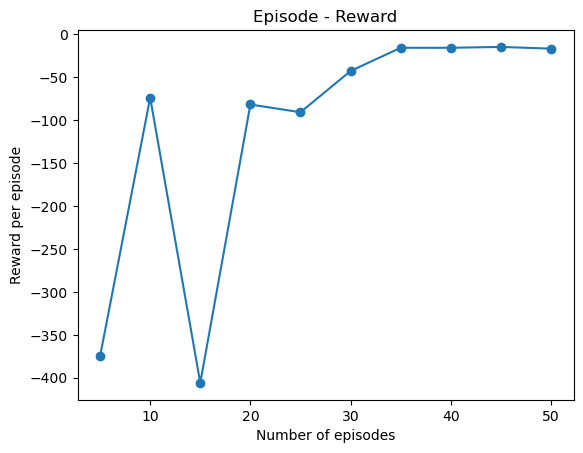

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 
## episode의 횟수를 지정 5~60까지 5단위로
episode_list = [5,10,15,20,25,30,35,40,45,50]
episode_list_reward = []

## episode_list를 하나씩 돌면서 값측정
for i in episode_list:
    ## reward 값을 반환받고, reward값은 음수이므로, 100을 더해서 값이 작을수록 좋은 것임을 나타냄
    if __name__ == '__main__':
        reward = main(i, alpha=0.5, gamma=0.4,
             epsilon = 0.05,result_screening = False)
        reward = reward
    ## reward에 하나씩 추가
    episode_list_reward.append(reward)
    
plt.plot(episode_list, episode_list_reward, marker='o', linestyle='-')
plt.title('Episode - Reward')
plt.xlabel('Number of episodes')
plt.ylabel('Reward per episode')

plt.show()

#### b) 모든 파라미터가 동일하고, alpha에 따른 Reward값 변화

Maze to solve and Agent start position:


█ █ █ █ █ █ █ █ 
█ . . . . . . █ 
🤖. █ █ . █ . █ 
█ . . █ █ . . █ 
█ █ . . █ . █ █ 
█ . █ . █ . . █ 
█ . . . . █ . ✔ 
█ █ █ █ █ █ █ █ 

Episode: 1 - Tot Steps: 169 Tot Reward: -1126
Episode: 2 - Tot Steps: 188 Tot Reward: -623
Episode: 3 - Tot Steps: 334 Tot Reward: -769
Episode: 4 - Tot Steps: 374 Tot Reward: -606
Episode: 5 - Tot Steps: 205 Tot Reward: -263
Episode: 6 - Tot Steps: 43 Tot Reward: -72
Episode: 7 - Tot Steps: 208 Tot Reward: -237
Episode: 8 - Tot Steps: 322 Tot Reward: -554
Episode: 9 - Tot Steps: 127 Tot Reward: -301
Episode: 10 - Tot Steps: 290 Tot Reward: -522
Episode: 11 - Tot Steps: 216 Tot Reward: -274
Episode: 12 - Tot Steps: 239 Tot Reward: -471
Episode: 13 - Tot Steps: 181 Tot Reward: -268
Episode: 14 - Tot Steps: 41 Tot Reward: -70
Episode: 15 - Tot Steps: 109 Tot Reward: -138
Episode: 16 - Tot Steps: 193 Tot Reward: -396
Episode: 17 - Tot Steps: 205 Tot Reward: -292
Episode: 18 - Tot Steps: 143 Tot Reward: -230
Episod

Episode: 2 - Tot Steps: 124 Tot Reward: -820
Episode: 3 - Tot Steps: 237 Tot Reward: -469
Episode: 4 - Tot Steps: 235 Tot Reward: -264
Episode: 5 - Tot Steps: 152 Tot Reward: -239
Episode: 6 - Tot Steps: 171 Tot Reward: -229
Episode: 7 - Tot Steps: 24 Tot Reward: -24
Episode: 8 - Tot Steps: 97 Tot Reward: -184
Episode: 9 - Tot Steps: 139 Tot Reward: -168
Episode: 10 - Tot Steps: 178 Tot Reward: -207
Episode: 11 - Tot Steps: 121 Tot Reward: -121
Episode: 12 - Tot Steps: 103 Tot Reward: -161
Episode: 13 - Tot Steps: 113 Tot Reward: -142
Episode: 14 - Tot Steps: 79 Tot Reward: -108
Episode: 15 - Tot Steps: 57 Tot Reward: -57
Episode: 16 - Tot Steps: 180 Tot Reward: -209
Episode: 17 - Tot Steps: 89 Tot Reward: -89
Episode: 18 - Tot Steps: 58 Tot Reward: -58
Episode: 19 - Tot Steps: 133 Tot Reward: -249
Episode: 20 - Tot Steps: 52 Tot Reward: -81
Episode: 21 - Tot Steps: 216 Tot Reward: -361
Episode: 22 - Tot Steps: 43 Tot Reward: -101
Episode: 23 - Tot Steps: 84 Tot Reward: -113
Episode: 2

Episode: 2 - Tot Steps: 130 Tot Reward: -826
Episode: 3 - Tot Steps: 200 Tot Reward: -432
Episode: 4 - Tot Steps: 224 Tot Reward: -398
Episode: 5 - Tot Steps: 59 Tot Reward: -88
Episode: 6 - Tot Steps: 114 Tot Reward: -143
Episode: 7 - Tot Steps: 211 Tot Reward: -298
Episode: 8 - Tot Steps: 54 Tot Reward: -54
Episode: 9 - Tot Steps: 73 Tot Reward: -131
Episode: 10 - Tot Steps: 114 Tot Reward: -172
Episode: 11 - Tot Steps: 33 Tot Reward: -62
Episode: 12 - Tot Steps: 54 Tot Reward: -54
Episode: 13 - Tot Steps: 111 Tot Reward: -140
Episode: 14 - Tot Steps: 38 Tot Reward: -67
Episode: 15 - Tot Steps: 40 Tot Reward: -40
Episode: 16 - Tot Steps: 102 Tot Reward: -131
Episode: 17 - Tot Steps: 65 Tot Reward: -181
Episode: 18 - Tot Steps: 54 Tot Reward: -54
Episode: 19 - Tot Steps: 26 Tot Reward: -26
Episode: 20 - Tot Steps: 28 Tot Reward: -86
Episode: 21 - Tot Steps: 27 Tot Reward: -27
Episode: 22 - Tot Steps: 31 Tot Reward: -31
Episode: 23 - Tot Steps: 27 Tot Reward: -27
Episode: 24 - Tot Step

Episode: 2 - Tot Steps: 82 Tot Reward: -952
Episode: 3 - Tot Steps: 69 Tot Reward: -98
Episode: 4 - Tot Steps: 188 Tot Reward: -217
Episode: 5 - Tot Steps: 203 Tot Reward: -406
Episode: 6 - Tot Steps: 32 Tot Reward: -32
Episode: 7 - Tot Steps: 95 Tot Reward: -95
Episode: 8 - Tot Steps: 95 Tot Reward: -95
Episode: 9 - Tot Steps: 67 Tot Reward: -154
Episode: 10 - Tot Steps: 72 Tot Reward: -101
Episode: 11 - Tot Steps: 30 Tot Reward: -30
Episode: 12 - Tot Steps: 54 Tot Reward: -54
Episode: 13 - Tot Steps: 55 Tot Reward: -84
Episode: 14 - Tot Steps: 58 Tot Reward: -58
Episode: 15 - Tot Steps: 27 Tot Reward: -27
Episode: 16 - Tot Steps: 31 Tot Reward: -31
Episode: 17 - Tot Steps: 31 Tot Reward: -60
Episode: 18 - Tot Steps: 68 Tot Reward: -126
Episode: 19 - Tot Steps: 25 Tot Reward: -112
Episode: 20 - Tot Steps: 38 Tot Reward: -67
Episode: 21 - Tot Steps: 18 Tot Reward: -18
Episode: 22 - Tot Steps: 25 Tot Reward: -25
Episode: 23 - Tot Steps: 17 Tot Reward: -17
Episode: 24 - Tot Steps: 18 Tot

step 15

█ █ █ █ █ █ █ █ 
█ . . . . . . █ 
. . █ █ . █ . █ 
█ . . █ █ . . █ 
█ █ . . █ . █ █ 
█ . █ . █ . . █ 
█ . . . . █ . 🏁
█ █ █ █ █ █ █ █ 


Finish!
Maze to solve and Agent start position:


█ █ █ █ █ █ █ █ 
█ . . . . . . █ 
🤖. █ █ . █ . █ 
█ . . █ █ . . █ 
█ █ . . █ . █ █ 
█ . █ . █ . . █ 
█ . . . . █ . ✔ 
█ █ █ █ █ █ █ █ 

Episode: 1 - Tot Steps: 55 Tot Reward: -867
Episode: 2 - Tot Steps: 418 Tot Reward: -2013
Episode: 3 - Tot Steps: 44 Tot Reward: -44
Episode: 4 - Tot Steps: 99 Tot Reward: -128
Episode: 5 - Tot Steps: 40 Tot Reward: -69
Episode: 6 - Tot Steps: 53 Tot Reward: -140
Episode: 7 - Tot Steps: 78 Tot Reward: -136
Episode: 8 - Tot Steps: 97 Tot Reward: -126
Episode: 9 - Tot Steps: 30 Tot Reward: -117
Episode: 10 - Tot Steps: 35 Tot Reward: -35
Episode: 11 - Tot Steps: 26 Tot Reward: -26
Episode: 12 - Tot Steps: 36 Tot Reward: -36
Episode: 13 - Tot Steps: 19 Tot Reward: -19
Episode: 14 - Tot Steps: 98 Tot Reward: -156
Episode: 15 - Tot Steps: 33 Tot Reward: -33
Episode

step 15

█ █ █ █ █ █ █ █ 
█ . . . . . . █ 
. . █ █ . █ . █ 
█ . . █ █ . . █ 
█ █ . . █ . █ █ 
█ . █ . █ . . █ 
█ . . . . █ . 🏁
█ █ █ █ █ █ █ █ 


Finish!


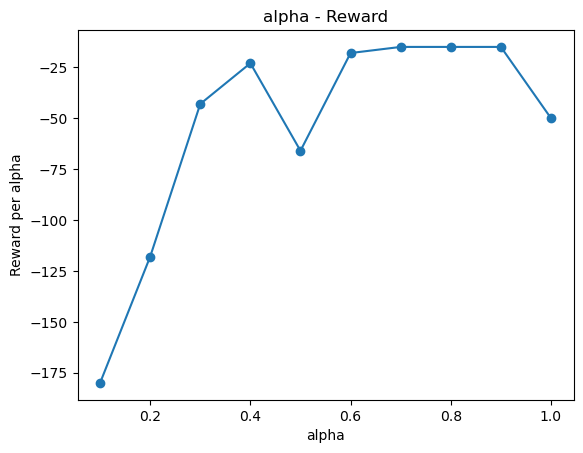

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 
## alpha 값을 0.1~ 1까지 0.1씩 증가
alpha_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
alpha_list_reward = []

## alpha_list를 하나씩 돌면서 값측정
for i in alpha_list:
    ## reward 값을 반환받고, reward값은 음수이므로, 100을 더해서 값이 작을수록 좋은 것임을 나타냄
    if __name__ == '__main__':
        reward = main(n_episodes=30, alpha =i, gamma=0.4,
             epsilon = 0.05, result_screening = False)
        reward = reward
    ## reward에 하나씩 추가
    alpha_list_reward.append(reward)
    
plt.plot(alpha_list, alpha_list_reward, marker='o', linestyle='-')
plt.title('alpha - Reward')
plt.xlabel('alpha')
plt.ylabel('Reward per alpha')

plt.show()

#### c) 모든 파라미터가 동일하고, gamma에 따른 Reward값 변화

Maze to solve and Agent start position:


█ █ █ █ █ █ █ █ 
█ . . . . . . █ 
🤖. █ █ . █ . █ 
█ . . █ █ . . █ 
█ █ . . █ . █ █ 
█ . █ . █ . . █ 
█ . . . . █ . ✔ 
█ █ █ █ █ █ █ █ 

Episode: 1 - Tot Steps: 293 Tot Reward: -2352
Episode: 2 - Tot Steps: 464 Tot Reward: -1073
Episode: 3 - Tot Steps: 170 Tot Reward: -228
Episode: 4 - Tot Steps: 140 Tot Reward: -169
Episode: 5 - Tot Steps: 161 Tot Reward: -248
Episode: 6 - Tot Steps: 86 Tot Reward: -115
Episode: 7 - Tot Steps: 91 Tot Reward: -91
Episode: 8 - Tot Steps: 179 Tot Reward: -266
Episode: 9 - Tot Steps: 108 Tot Reward: -253
Episode: 10 - Tot Steps: 125 Tot Reward: -125
Episode: 11 - Tot Steps: 87 Tot Reward: -116
Episode: 12 - Tot Steps: 74 Tot Reward: -132
Episode: 13 - Tot Steps: 137 Tot Reward: -282
Episode: 14 - Tot Steps: 61 Tot Reward: -61
Episode: 15 - Tot Steps: 88 Tot Reward: -175
Episode: 16 - Tot Steps: 35 Tot Reward: -64
Episode: 17 - Tot Steps: 51 Tot Reward: -80
Episode: 18 - Tot Steps: 51 Tot Reward: -51
Episode: 19 - T

Episode: 2 - Tot Steps: 253 Tot Reward: -1587
Episode: 3 - Tot Steps: 203 Tot Reward: -551
Episode: 4 - Tot Steps: 256 Tot Reward: -401
Episode: 5 - Tot Steps: 99 Tot Reward: -215
Episode: 6 - Tot Steps: 79 Tot Reward: -137
Episode: 7 - Tot Steps: 92 Tot Reward: -179
Episode: 8 - Tot Steps: 75 Tot Reward: -133
Episode: 9 - Tot Steps: 165 Tot Reward: -194
Episode: 10 - Tot Steps: 69 Tot Reward: -98
Episode: 11 - Tot Steps: 220 Tot Reward: -307
Episode: 12 - Tot Steps: 79 Tot Reward: -137
Episode: 13 - Tot Steps: 58 Tot Reward: -58
Episode: 14 - Tot Steps: 30 Tot Reward: -30
Episode: 15 - Tot Steps: 50 Tot Reward: -50
Episode: 16 - Tot Steps: 55 Tot Reward: -55
Episode: 17 - Tot Steps: 55 Tot Reward: -84
Episode: 18 - Tot Steps: 52 Tot Reward: -52
Episode: 19 - Tot Steps: 56 Tot Reward: -85
Episode: 20 - Tot Steps: 25 Tot Reward: -54
Episode: 21 - Tot Steps: 51 Tot Reward: -51
Episode: 22 - Tot Steps: 21 Tot Reward: -50
Episode: 23 - Tot Steps: 52 Tot Reward: -81
Episode: 24 - Tot Steps:

step 15

█ █ █ █ █ █ █ █ 
█ . . . . . . █ 
. . █ █ . █ . █ 
█ . . █ █ . . █ 
█ █ . . █ . █ █ 
█ . █ . █ . . █ 
█ . . . . █ . 🏁
█ █ █ █ █ █ █ █ 


Finish!
Maze to solve and Agent start position:


█ █ █ █ █ █ █ █ 
█ . . . . . . █ 
🤖. █ █ . █ . █ 
█ . . █ █ . . █ 
█ █ . . █ . █ █ 
█ . █ . █ . . █ 
█ . . . . █ . ✔ 
█ █ █ █ █ █ █ █ 

Episode: 1 - Tot Steps: 132 Tot Reward: -1379
Episode: 2 - Tot Steps: 343 Tot Reward: -1358
Episode: 3 - Tot Steps: 139 Tot Reward: -226
Episode: 4 - Tot Steps: 134 Tot Reward: -134
Episode: 5 - Tot Steps: 74 Tot Reward: -132
Episode: 6 - Tot Steps: 24 Tot Reward: -53
Episode: 7 - Tot Steps: 57 Tot Reward: -86
Episode: 8 - Tot Steps: 119 Tot Reward: -206
Episode: 9 - Tot Steps: 128 Tot Reward: -215
Episode: 10 - Tot Steps: 82 Tot Reward: -111
Episode: 11 - Tot Steps: 86 Tot Reward: -115
Episode: 12 - Tot Steps: 31 Tot Reward: -60
Episode: 13 - Tot Steps: 68 Tot Reward: -126
Episode: 14 - Tot Steps: 118 Tot Reward: -292
Episode: 15 - Tot Steps: 71 Tot Reward: -

Episode: 2 - Tot Steps: 379 Tot Reward: -1568
Episode: 3 - Tot Steps: 63 Tot Reward: -121
Episode: 4 - Tot Steps: 68 Tot Reward: -184
Episode: 5 - Tot Steps: 100 Tot Reward: -129
Episode: 6 - Tot Steps: 64 Tot Reward: -93
Episode: 7 - Tot Steps: 51 Tot Reward: -80
Episode: 8 - Tot Steps: 191 Tot Reward: -365
Episode: 9 - Tot Steps: 48 Tot Reward: -48
Episode: 10 - Tot Steps: 60 Tot Reward: -60
Episode: 11 - Tot Steps: 68 Tot Reward: -126
Episode: 12 - Tot Steps: 46 Tot Reward: -46
Episode: 13 - Tot Steps: 37 Tot Reward: -37
Episode: 14 - Tot Steps: 83 Tot Reward: -286
Episode: 15 - Tot Steps: 53 Tot Reward: -140
Episode: 16 - Tot Steps: 19 Tot Reward: -48
Episode: 17 - Tot Steps: 26 Tot Reward: -26
Episode: 18 - Tot Steps: 28 Tot Reward: -28
Episode: 19 - Tot Steps: 32 Tot Reward: -32
Episode: 20 - Tot Steps: 25 Tot Reward: -25
Episode: 21 - Tot Steps: 114 Tot Reward: -172
Episode: 22 - Tot Steps: 39 Tot Reward: -68
Episode: 23 - Tot Steps: 25 Tot Reward: -25
Episode: 24 - Tot Steps: 1

Episode: 2 - Tot Steps: 249 Tot Reward: -771
Episode: 3 - Tot Steps: 81 Tot Reward: -110
Episode: 4 - Tot Steps: 98 Tot Reward: -127
Episode: 5 - Tot Steps: 125 Tot Reward: -125
Episode: 6 - Tot Steps: 101 Tot Reward: -130
Episode: 7 - Tot Steps: 51 Tot Reward: -51
Episode: 8 - Tot Steps: 37 Tot Reward: -95
Episode: 9 - Tot Steps: 34 Tot Reward: -63
Episode: 10 - Tot Steps: 98 Tot Reward: -127
Episode: 11 - Tot Steps: 87 Tot Reward: -116
Episode: 12 - Tot Steps: 35 Tot Reward: -35
Episode: 13 - Tot Steps: 33 Tot Reward: -178
Episode: 14 - Tot Steps: 94 Tot Reward: -123
Episode: 15 - Tot Steps: 20 Tot Reward: -20
Episode: 16 - Tot Steps: 42 Tot Reward: -42
Episode: 17 - Tot Steps: 127 Tot Reward: -272
Episode: 18 - Tot Steps: 21 Tot Reward: -21
Episode: 19 - Tot Steps: 23 Tot Reward: -23
Episode: 20 - Tot Steps: 29 Tot Reward: -29
Episode: 21 - Tot Steps: 24 Tot Reward: -24
Episode: 22 - Tot Steps: 24 Tot Reward: -24
Episode: 23 - Tot Steps: 30 Tot Reward: -59
Episode: 24 - Tot Steps: 7

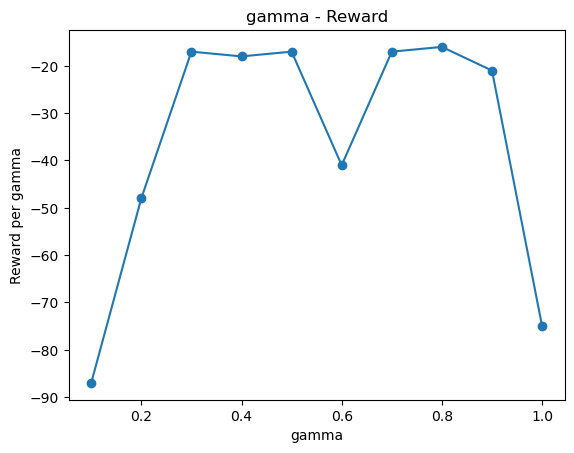

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 
## gamma값을 0.1~ 1까지 0.1씩 증가
gamma_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma_list_reward = []

## gamma_list를 하나씩 돌면서 값측정
for i in gamma_list:
    ## reward 값을 반환받고, reward값은 음수이므로, 100을 더해서 값이 작을수록 좋은 것임을 나타냄
    if __name__ == '__main__':
        reward = main(n_episodes=30, alpha =0.5, gamma=i,
             epsilon = 0.05, result_screening = False)
        reward = reward
    ## reward에 하나씩 추가
    gamma_list_reward.append(reward)
    
plt.plot(gamma_list, gamma_list_reward, marker='o', linestyle='-')
plt.title('gamma - Reward')
plt.xlabel('gamma')
plt.ylabel('Reward per gamma')

plt.show()

#### d) 모든 파라미터가 동일하고, epsilon에 따른 Reward값 변화

Maze to solve and Agent start position:


█ █ █ █ █ █ █ █ 
█ . . . . . . █ 
🤖. █ █ . █ . █ 
█ . . █ █ . . █ 
█ █ . . █ . █ █ 
█ . █ . █ . . █ 
█ . . . . █ . ✔ 
█ █ █ █ █ █ █ █ 

Episode: 1 - Tot Steps: 61 Tot Reward: -728
Episode: 2 - Tot Steps: 101 Tot Reward: -826
Episode: 3 - Tot Steps: 260 Tot Reward: -1246
Episode: 4 - Tot Steps: 183 Tot Reward: -212
Episode: 5 - Tot Steps: 93 Tot Reward: -180
Episode: 6 - Tot Steps: 169 Tot Reward: -459
Episode: 7 - Tot Steps: 176 Tot Reward: -263
Episode: 8 - Tot Steps: 55 Tot Reward: -113
Episode: 9 - Tot Steps: 79 Tot Reward: -108
Episode: 10 - Tot Steps: 104 Tot Reward: -220
Episode: 11 - Tot Steps: 170 Tot Reward: -344
Episode: 12 - Tot Steps: 43 Tot Reward: -43
Episode: 13 - Tot Steps: 94 Tot Reward: -152
Episode: 14 - Tot Steps: 45 Tot Reward: -45
Episode: 15 - Tot Steps: 35 Tot Reward: -64
Episode: 16 - Tot Steps: 80 Tot Reward: -167
Episode: 17 - Tot Steps: 28 Tot Reward: -28
Episode: 18 - Tot Steps: 37 Tot Reward: -66
Episode: 19 - Tot 

Episode: 2 - Tot Steps: 33 Tot Reward: -381
Episode: 3 - Tot Steps: 144 Tot Reward: -811
Episode: 4 - Tot Steps: 508 Tot Reward: -2393
Episode: 5 - Tot Steps: 44 Tot Reward: -131
Episode: 6 - Tot Steps: 63 Tot Reward: -150
Episode: 7 - Tot Steps: 195 Tot Reward: -659
Episode: 8 - Tot Steps: 91 Tot Reward: -207
Episode: 9 - Tot Steps: 127 Tot Reward: -243
Episode: 10 - Tot Steps: 133 Tot Reward: -191
Episode: 11 - Tot Steps: 93 Tot Reward: -209
Episode: 12 - Tot Steps: 57 Tot Reward: -86
Episode: 13 - Tot Steps: 62 Tot Reward: -91
Episode: 14 - Tot Steps: 74 Tot Reward: -248
Episode: 15 - Tot Steps: 30 Tot Reward: -59
Episode: 16 - Tot Steps: 27 Tot Reward: -27
Episode: 17 - Tot Steps: 253 Tot Reward: -601
Episode: 18 - Tot Steps: 46 Tot Reward: -104
Episode: 19 - Tot Steps: 29 Tot Reward: -58
Episode: 20 - Tot Steps: 153 Tot Reward: -443
Episode: 21 - Tot Steps: 27 Tot Reward: -27
Episode: 22 - Tot Steps: 25 Tot Reward: -25
Episode: 23 - Tot Steps: 24 Tot Reward: -24
Episode: 24 - Tot 

Episode: 2 - Tot Steps: 61 Tot Reward: -525
Episode: 3 - Tot Steps: 386 Tot Reward: -2155
Episode: 4 - Tot Steps: 89 Tot Reward: -524
Episode: 5 - Tot Steps: 108 Tot Reward: -543
Episode: 6 - Tot Steps: 126 Tot Reward: -445
Episode: 7 - Tot Steps: 135 Tot Reward: -425
Episode: 8 - Tot Steps: 91 Tot Reward: -236
Episode: 9 - Tot Steps: 146 Tot Reward: -436
Episode: 10 - Tot Steps: 187 Tot Reward: -622
Episode: 11 - Tot Steps: 48 Tot Reward: -251
Episode: 12 - Tot Steps: 215 Tot Reward: -795
Episode: 13 - Tot Steps: 49 Tot Reward: -223
Episode: 14 - Tot Steps: 41 Tot Reward: -99
Episode: 15 - Tot Steps: 26 Tot Reward: -55
Episode: 16 - Tot Steps: 149 Tot Reward: -439
Episode: 17 - Tot Steps: 36 Tot Reward: -123
Episode: 18 - Tot Steps: 48 Tot Reward: -77
Episode: 19 - Tot Steps: 48 Tot Reward: -251
Episode: 20 - Tot Steps: 37 Tot Reward: -95
Episode: 21 - Tot Steps: 65 Tot Reward: -181
Episode: 22 - Tot Steps: 32 Tot Reward: -90
Episode: 23 - Tot Steps: 21 Tot Reward: -108
Episode: 24 - 

Episode: 2 - Tot Steps: 125 Tot Reward: -1053
Episode: 3 - Tot Steps: 429 Tot Reward: -3242
Episode: 4 - Tot Steps: 78 Tot Reward: -281
Episode: 5 - Tot Steps: 162 Tot Reward: -626
Episode: 6 - Tot Steps: 168 Tot Reward: -835
Episode: 7 - Tot Steps: 125 Tot Reward: -386
Episode: 8 - Tot Steps: 147 Tot Reward: -669
Episode: 9 - Tot Steps: 98 Tot Reward: -359
Episode: 10 - Tot Steps: 75 Tot Reward: -249
Episode: 11 - Tot Steps: 121 Tot Reward: -614
Episode: 12 - Tot Steps: 36 Tot Reward: -94
Episode: 13 - Tot Steps: 39 Tot Reward: -126
Episode: 14 - Tot Steps: 48 Tot Reward: -135
Episode: 15 - Tot Steps: 192 Tot Reward: -1033
Episode: 16 - Tot Steps: 47 Tot Reward: -250
Episode: 17 - Tot Steps: 22 Tot Reward: -80
Episode: 18 - Tot Steps: 35 Tot Reward: -35
Episode: 19 - Tot Steps: 57 Tot Reward: -231
Episode: 20 - Tot Steps: 87 Tot Reward: -406
Episode: 21 - Tot Steps: 56 Tot Reward: -346
Episode: 22 - Tot Steps: 22 Tot Reward: -167
Episode: 23 - Tot Steps: 66 Tot Reward: -240
Episode: 2

Episode: 2 - Tot Steps: 127 Tot Reward: -1113
Episode: 3 - Tot Steps: 88 Tot Reward: -697
Episode: 4 - Tot Steps: 111 Tot Reward: -662
Episode: 5 - Tot Steps: 80 Tot Reward: -370
Episode: 6 - Tot Steps: 34 Tot Reward: -92
Episode: 7 - Tot Steps: 33 Tot Reward: -236
Episode: 8 - Tot Steps: 167 Tot Reward: -950
Episode: 9 - Tot Steps: 63 Tot Reward: -440
Episode: 10 - Tot Steps: 121 Tot Reward: -788
Episode: 11 - Tot Steps: 181 Tot Reward: -964
Episode: 12 - Tot Steps: 82 Tot Reward: -401
Episode: 13 - Tot Steps: 222 Tot Reward: -1034
Episode: 14 - Tot Steps: 203 Tot Reward: -1102
Episode: 15 - Tot Steps: 76 Tot Reward: -511
Episode: 16 - Tot Steps: 54 Tot Reward: -228
Episode: 17 - Tot Steps: 74 Tot Reward: -480
Episode: 18 - Tot Steps: 87 Tot Reward: -580
Episode: 19 - Tot Steps: 137 Tot Reward: -978
Episode: 20 - Tot Steps: 62 Tot Reward: -410
Episode: 21 - Tot Steps: 47 Tot Reward: -279
Episode: 22 - Tot Steps: 44 Tot Reward: -160
Episode: 23 - Tot Steps: 110 Tot Reward: -806
Episode

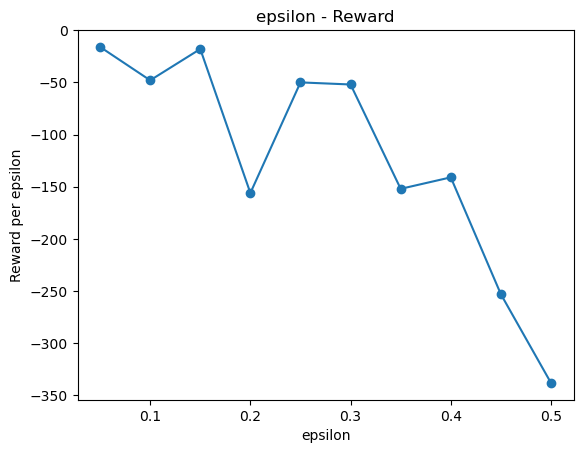

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline 
## epsilon값을 0.05~ 0.5까지 0.1씩 증가
epsilon_list = [0.05, 0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
epsilon_list_reward = []

## epsilon_list를 하나씩 돌면서 값측정
for i in epsilon_list:
    ## reward 값을 반환받고, reward값은 음수이므로, 100을 더해서 값이 작을수록 좋은 것임을 나타냄
    if __name__ == '__main__':
        reward = main(n_episodes=30, alpha =0.5, gamma=0.4,
             epsilon = i, result_screening = False)
        reward = reward
    ## reward에 하나씩 추가
    epsilon_list_reward.append(reward)
    
plt.plot(epsilon_list, epsilon_list_reward, marker='o', linestyle='-')
plt.title('epsilon - Reward')
plt.xlabel('epsilon')
plt.ylabel('Reward per epsilon')

plt.show()

### 번외) 파라미터값 직접 지정해보기 학습시키기

In [ ]:
print("강화학습에 대한 파라미터를 입력받습니다. 자료형에 맞춰서 입력값을 잘 넣어주세요!!\n")
n_episodes = int(input("episode의 횟수를 입력(int) : "))
alpha = float(input("하나의 step당 학습률을 입력(float) : "))
gamma = float(input("미래의 보상이 현재의 보상보다 얼마나 중요한지(float) :"))
epsilon = float(input("epsilon 가중치 입력(float) :"))
show = bool(input("traing 모든 과정을 보시겠습니까?(True or False)"))

if __name__ == '__main__':
    main(n_episodes, alpha, gamma,
         epsilon)
